In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv" study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on = 'Mouse ID')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
 # Checking the number of mice in the DataFrame
merged_df.groupby('Mouse ID').nunique()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,,
a203,1,10,10,3,1,1,1,1
a251,1,10,10,2,1,1,1,1
a262,1,10,10,5,1,1,1,1
a275,1,10,10,4,1,1,1,1
a366,1,7,7,2,1,1,1,1
...,...,...,...,...,...,...,...,...
z435,1,3,3,1,1,1,1,1
z578,1,10,10,1,1,1,1,1
z581,1,10,10,4,1,1,1,1


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(merged_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})

summarystats

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


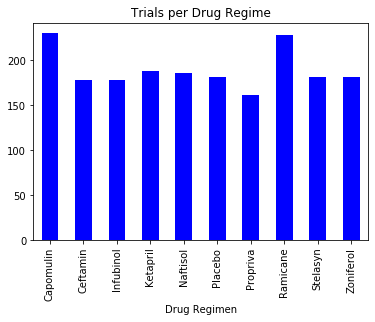

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
datapoints = summarystats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout() 

Text(0.5, 0, 'Drug Regime')

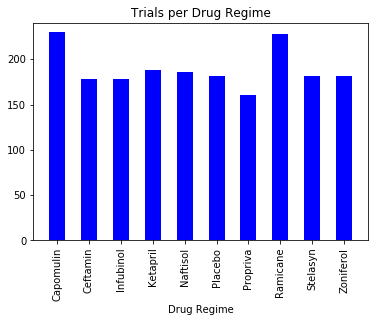

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merged_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [7]:
# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


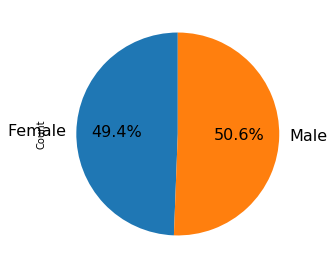

In [8]:
# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (merged_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

([<matplotlib.patches.Wedge at 0x2299f07bcc8>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

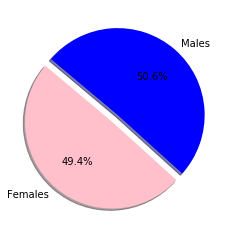

In [10]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
 
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | (merged_df["Drug Regimen"] == "Ramicane") | (merged_df["Drug Regimen"] == "Ceftamin") | (merged_df["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


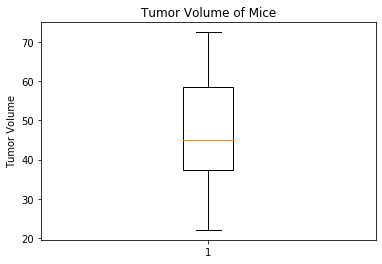

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

In [13]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# Create a new DataFrame that looks into Capomulin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
28,1691,s185,0,45.000000,0,Capomulin,Female,3,17
29,1692,s185,5,43.878496,0,Capomulin,Female,3,17
30,1693,s185,10,37.614948,0,Capomulin,Female,3,17
31,1694,s185,15,38.177232,0,Capomulin,Female,3,17
32,1695,s185,20,36.866876,0,Capomulin,Female,3,17
33,1696,s185,25,33.949940,0,Capomulin,Female,3,17
34,1697,s185,30,32.959671,1,Capomulin,Female,3,17
35,1698,s185,35,28.328531,1,Capomulin,Female,3,17
36,1699,s185,40,25.472143,1,Capomulin,Female,3,17
37,1700,s185,45,23.343598,1,Capomulin,Female,3,17


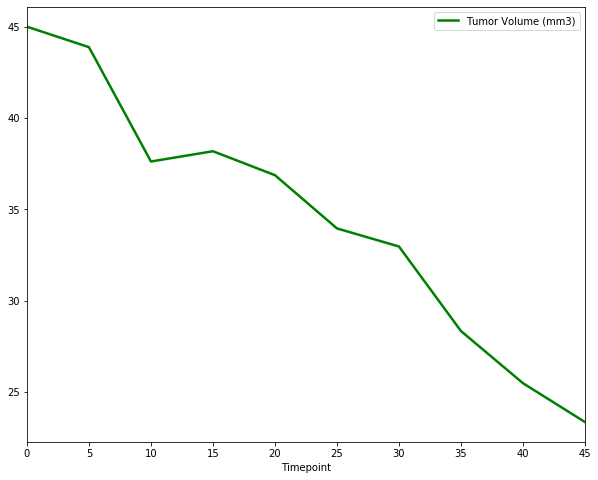

In [15]:
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,b128,22,45.651331
2,b128,22,43.270852
3,b128,22,43.784893
4,b128,22,42.731552


In [17]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


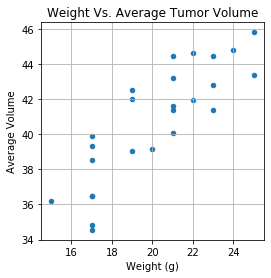

In [18]:
# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [19]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


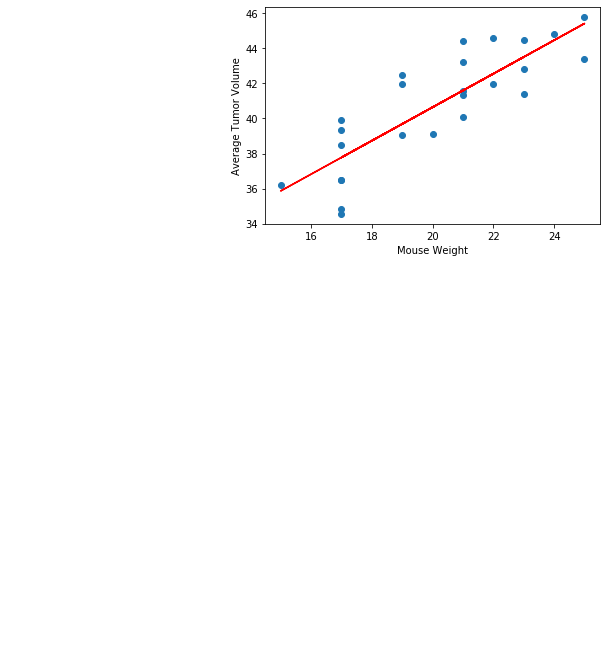

In [20]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()